In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import gym
import gym_anytrading

import yfinance as yf

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [2]:
from gym_anytrading.envs import StocksEnv
from finta import TA

## load data

In [3]:
sen = pd.read_csv("ISEE-Index-20210728-022055.csv")

In [4]:
sen

,DATE,ALL SECURITIES,10 AVG,20 AVG,50 AVG,ALL EQUITIES,10 AVG.1,20 AVG.1,50 AVG.1,ALL ETFS,10 AVG.2,20 AVG.2,50 AVG.2
0,1/3/2006,149,0,0,0,212,0,0,0,49,0,0,0
1,1/4/2006,180,0,0,0,218,0,0,0,74,0,0,0
2,1/5/2006,195,0,0,0,264,0,0,0,38,0,0,0
3,1/6/2006,144,0,0,0,226,0,0,0,28,0,0,0
4,1/9/2006,188,0,0,0,256,0,0,0,45,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,7/21/2021,110,99,106,113,139,135,143,156,71,67,67,71
3914,7/22/2021,87,97,104,113,136,135,141,156,44,64,66,71
3915,7/23/2021,124,98,103,114,166,137,140,157,83,63,67,72
3916,7/26/2021,104,98,104,114,122,137,139,157,78,62,68,72


In [5]:
se = sen.iloc[:,5:7]

In [6]:
date = sen.iloc[:,:1]

In [7]:
sen = date.join(se)

In [8]:
sen

,DATE,ALL EQUITIES,10 AVG.1
0,1/3/2006,212,0
1,1/4/2006,218,0
2,1/5/2006,264,0
3,1/6/2006,226,0
4,1/9/2006,256,0
...,...,...,...
3913,7/21/2021,139,135
3914,7/22/2021,136,135
3915,7/23/2021,166,137
3916,7/26/2021,122,137


In [9]:
sen.DATE = pd.to_datetime(sen.DATE)

In [10]:
sen.rename(columns = {"DATE":"Date"}, inplace = True)

In [11]:
sen.set_index("Date", inplace = True)

In [12]:
sen

,ALL EQUITIES,10 AVG.1
Date,,
2006-01-03,212,0
2006-01-04,218,0
2006-01-05,264,0
2006-01-06,226,0
2006-01-09,256,0
...,...,...
2021-07-21,139,135
2021-07-22,136,135
2021-07-23,166,137


In [13]:
sen = sen.loc["2020-07-30":]

In [14]:
sen

,ALL EQUITIES,10 AVG.1
Date,,
2020-07-30,136,152
2020-07-31,135,151
2020-08-03,181,156
2020-08-04,167,154
2020-08-05,172,157
...,...,...
2021-07-21,139,135
2021-07-22,136,135
2021-07-23,166,137


In [15]:
df = yf.download("GM","2020-07-31","2021-07-28")

[*********************100%***********************]  1 of 1 completed


In [16]:
pd.options.display.max_rows = 550

In [17]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-30,25.129999,25.459999,25.020000,25.200001,25.200001,16012000
2020-07-31,25.120001,25.150000,24.440001,24.889999,24.889999,17789000
2020-08-03,25.059999,25.770000,24.820000,25.639999,25.639999,10441200
2020-08-04,25.870001,26.030001,25.510000,25.799999,25.799999,15728800
2020-08-05,26.200001,26.350000,25.879999,26.330000,26.330000,9075100
2020-08-06,26.170000,27.190001,26.150000,26.620001,26.620001,14171800
2020-08-07,26.480000,26.809999,26.170000,26.719999,26.719999,8038600
2020-08-10,26.910000,28.059999,26.860001,27.980000,27.980000,10853600
2020-08-11,28.469999,29.350000,28.440001,28.520000,28.520000,17260200


In [18]:
df.drop(columns = "Adj Close", inplace = True)

In [19]:
df.Volume = df.Volume.astype("float")

In [20]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [21]:
df["SMA"] = TA.SMA(df,12)
df["RSI"] = TA.RSI(df)
df["OBV"] = TA.OBV(df)

In [22]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-07-30,25.129999,25.459999,25.020000,25.200001,16012000.0,NaN,NaN,NaN
2020-07-31,25.120001,25.150000,24.440001,24.889999,17789000.0,NaN,0.000000,-17789000.0
2020-08-03,25.059999,25.770000,24.820000,25.639999,10441200.0,NaN,72.264192,-7347800.0
2020-08-04,25.870001,26.030001,25.510000,25.799999,15728800.0,NaN,76.213310,8381000.0
2020-08-05,26.200001,26.350000,25.879999,26.330000,9075100.0,NaN,84.225564,17456100.0
2020-08-06,26.170000,27.190001,26.150000,26.620001,14171800.0,NaN,86.838023,31627900.0
2020-08-07,26.480000,26.809999,26.170000,26.719999,8038600.0,NaN,87.600586,39666500.0
2020-08-10,26.910000,28.059999,26.860001,27.980000,10853600.0,NaN,93.058098,50520100.0
2020-08-11,28.469999,29.350000,28.440001,28.520000,17260200.0,NaN,94.230195,67780300.0


In [23]:
df.fillna(0, inplace = True)

In [24]:
df

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-07-30,25.129999,25.459999,25.020000,25.200001,16012000.0,0.000000,0.000000,0.0
2020-07-31,25.120001,25.150000,24.440001,24.889999,17789000.0,0.000000,0.000000,-17789000.0
2020-08-03,25.059999,25.770000,24.820000,25.639999,10441200.0,0.000000,72.264192,-7347800.0
2020-08-04,25.870001,26.030001,25.510000,25.799999,15728800.0,0.000000,76.213310,8381000.0
2020-08-05,26.200001,26.350000,25.879999,26.330000,9075100.0,0.000000,84.225564,17456100.0
2020-08-06,26.170000,27.190001,26.150000,26.620001,14171800.0,0.000000,86.838023,31627900.0
2020-08-07,26.480000,26.809999,26.170000,26.719999,8038600.0,0.000000,87.600586,39666500.0
2020-08-10,26.910000,28.059999,26.860001,27.980000,10853600.0,0.000000,93.058098,50520100.0
2020-08-11,28.469999,29.350000,28.440001,28.520000,17260200.0,0.000000,94.230195,67780300.0


In [25]:
df = df.join(sen)

In [26]:
df.fillna(0, inplace = True)

In [27]:
df

,Open,High,Low,Close,Volume,SMA,RSI,OBV,ALL EQUITIES,10 AVG.1
Date,,,,,,,,,,
2020-07-30,25.129999,25.459999,25.020000,25.200001,16012000.0,0.000000,0.000000,0.0,136,152
2020-07-31,25.120001,25.150000,24.440001,24.889999,17789000.0,0.000000,0.000000,-17789000.0,135,151
2020-08-03,25.059999,25.770000,24.820000,25.639999,10441200.0,0.000000,72.264192,-7347800.0,181,156
2020-08-04,25.870001,26.030001,25.510000,25.799999,15728800.0,0.000000,76.213310,8381000.0,167,154
2020-08-05,26.200001,26.350000,25.879999,26.330000,9075100.0,0.000000,84.225564,17456100.0,172,157
2020-08-06,26.170000,27.190001,26.150000,26.620001,14171800.0,0.000000,86.838023,31627900.0,163,160
2020-08-07,26.480000,26.809999,26.170000,26.719999,8038600.0,0.000000,87.600586,39666500.0,170,163
2020-08-10,26.910000,28.059999,26.860001,27.980000,10853600.0,0.000000,93.058098,50520100.0,153,158
2020-08-11,28.469999,29.350000,28.440001,28.520000,17260200.0,0.000000,94.230195,67780300.0,164,159


In [28]:
env = gym.make("stocks-v0", df = df, frame_bound=(5,250), window_size = 5)


info {'total_reward': 12.350006103515625, 'total_profit': 0.5367622461092372, 'position': 1}


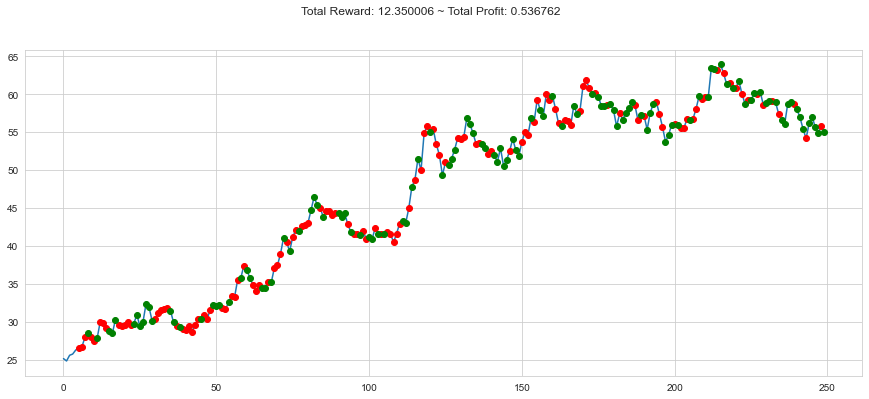

In [29]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

##  Create Custom enviroments

In [30]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'Volume','SMA', 'RSI', 'OBV',"ALL EQUITIES","10 AVG.1"]].to_numpy()[start:end]
    return prices, signal_features

In [31]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [32]:
env2.signal_features

array([[ 2.52000008e+01,  1.60120000e+07,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.36000000e+02,
         1.52000000e+02],
       [ 2.48899994e+01,  1.77890000e+07,  0.00000000e+00,
         0.00000000e+00, -1.77890000e+07,  1.35000000e+02,
         1.51000000e+02],
       [ 2.56399994e+01,  1.04412000e+07,  0.00000000e+00,
         7.22641920e+01, -7.34780000e+06,  1.81000000e+02,
         1.56000000e+02],
       [ 2.57999992e+01,  1.57288000e+07,  0.00000000e+00,
         7.62133103e+01,  8.38100000e+06,  1.67000000e+02,
         1.54000000e+02],
       [ 2.63299999e+01,  9.07510000e+06,  0.00000000e+00,
         8.42255643e+01,  1.74561000e+07,  1.72000000e+02,
         1.57000000e+02],
       [ 2.66200008e+01,  1.41718000e+07,  0.00000000e+00,
         8.68380230e+01,  3.16279000e+07,  1.63000000e+02,
         1.60000000e+02],
       [ 2.67199993e+01,  8.03860000e+06,  0.00000000e+00,
         8.76005856e+01,  3.96665000e+07,  1.70000000e+02,
         1.6300000

In [33]:
env2.prices

array([25.20000076, 24.88999939, 25.63999939, 25.79999924, 26.32999992,
       26.62000084, 26.71999931, 27.97999954, 28.52000046, 28.03000069,
       27.54999924, 27.86000061, 30.01000023, 29.84000015, 29.21999931,
       28.82999992, 28.55999947, 30.30999947, 29.69000053, 29.47999954,
       29.69000053, 30.02000046, 29.62999916, 29.79000092, 30.95999908,
       29.47999954, 30.        , 32.38000107, 31.95000076, 30.17000008,
       30.45999908, 31.18000031, 31.57999992, 31.79000092, 31.92000008,
       31.5       , 30.        , 29.44000053, 29.34000015, 29.11000061,
       29.        , 29.44000053, 28.73999977, 29.59000015, 30.37999916,
       30.45999908, 30.95999908, 30.39999962, 31.62000084, 32.20999908])

In [34]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV,ALL EQUITIES,10 AVG.1
Date,,,,,,,,,,
2020-07-30,25.129999,25.459999,25.020000,25.200001,16012000.0,0.0,0.000000,0.0,136,152
2020-07-31,25.120001,25.150000,24.440001,24.889999,17789000.0,0.0,0.000000,-17789000.0,135,151
2020-08-03,25.059999,25.770000,24.820000,25.639999,10441200.0,0.0,72.264192,-7347800.0,181,156
2020-08-04,25.870001,26.030001,25.510000,25.799999,15728800.0,0.0,76.213310,8381000.0,167,154
2020-08-05,26.200001,26.350000,25.879999,26.330000,9075100.0,0.0,84.225564,17456100.0,172,157


## Train model in enviroment

In [35]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [36]:
model = PPO("MlpPolicy", env, verbose = 1)
model.learn(total_timesteps = 10000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2187 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1523        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011236359 |
|    clip_fraction        | 0.0649      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.258      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.486       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 1.2         |
-----------------------------------------
-----------------

## Evaluation and plot

In [37]:

env = MyCustomEnv(df=df, window_size=12, frame_bound=(200,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -0.2500038146972656, 'total_profit': 0.8414401832712806, 'position': 0}


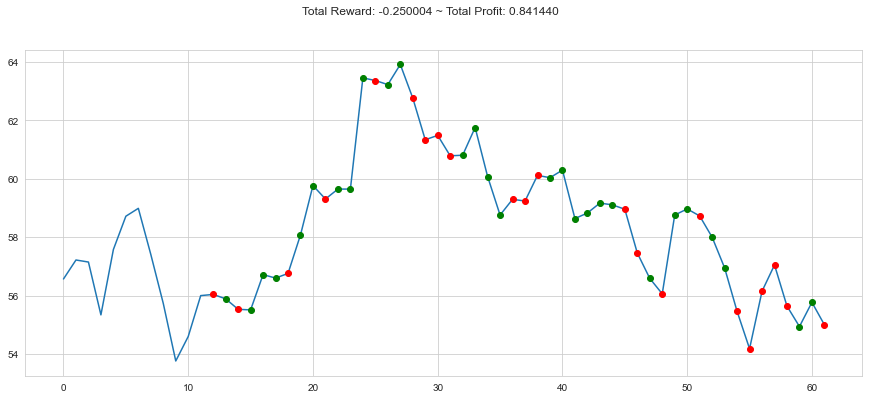

In [38]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [39]:
env.max_possible_profit()

1.3881334855310234